<a href="https://colab.research.google.com/github/shairatabassum/PyTorch_Learning/blob/main/PyTorch_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning with PyTorch** (part I)
A PyTorch notebook that I created while learning **PyTorch** through a series of tutorials on YouTube.

Source: [PyTorch Tutorials - Complete Beginner Course](https://www.youtube.com/watch?v=EMXfZB8FVUA&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4)

> **Table of contents**
> *  Tensor Basics
> *  Gradient Calculation with Autograd
> *  Backpropagation Algorithm
> *  Gradient Descent with Autograd and Backpropagation



In [ ]:
import torch
import numpy as np

### **Tensor Basics**
A tensor is a container like arrays or martices which can store data in N dimensions.

We can create an N-dimensional tensor in the following ways: 

*   Empty tensor: tensor.empty(a,b)
*   Random values: tensor.rand(a,b)
*   Zeros: tensor.zeros(a,b)
*   Ones: tensor.ones(a,b)
*   List: tensor.tensor([a,b,c])


In [ ]:
# create tensor with random values
x = torch.rand(2, 3)
print(x)

tensor([[0.5330, 0.6598, 0.7579],
        [0.4180, 0.5001, 0.1037]])


In [ ]:
# create tensor from a list of data
x = torch.tensor([2.5, 3.1])
print(x)

tensor([2.5000, 3.1000])


In [ ]:
# set data type to integer
x = torch.ones(2,3, dtype=torch.int)
print(x)

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)


**Basic Operations**

*   **Element-wise addition:** Let, 'x' and 'y' are two tensors.
    *  z = x+y
    *  z = torch.add(x,y)
*   **In-place addition:** Let, 'x' and 'y' are two tensors.
    *  y.add_(x)
*   **Similarly other operations:**
    * Element-wise Substraction: torch.sub(x,y)
    * In-place Substraction: y.sub_(x)
    * Element-wise Multiplication: torch.mul(x,y)
    * In-place Multiplication: y.mul_(x)
    * Element-wise Division: torch.div(x,y)
    * In-place Division: y.div_(x)
*  **Slicing:** similar to NumPy
*  Printing exact value using **item** method if the tensor contains only one element





In [ ]:
x = torch.rand(2,2)
y = torch.rand(2,2)
print(x)
print(y)

# element-wise addition
z = torch.add(x, y)
print(z)

# in-place addition
y.add_(x)
print(y)

tensor([[0.0094, 0.5772],
        [0.0075, 0.7387]])
tensor([[0.4397, 0.0900],
        [0.1199, 0.7112]])
tensor([[0.4491, 0.6672],
        [0.1274, 1.4499]])
tensor([[0.4491, 0.6672],
        [0.1274, 1.4499]])


In [ ]:
# slicing
x = torch.rand(5, 3)
print(x)
print(x[:,0])

tensor([[0.5835, 0.6319, 0.6027],
        [0.8808, 0.3355, 0.3617],
        [0.6630, 0.6068, 0.6958],
        [0.3266, 0.4545, 0.3639],
        [0.0905, 0.2668, 0.5568]])
tensor([0.5835, 0.8808, 0.6630, 0.3266, 0.0905])


In [ ]:
# printing actual value (if there is only one element in the tensor)
print(x[1,1])
print(x[1,1].item())

tensor(0.3355)
0.33550912141799927


**Reshaping Tensors**

In [ ]:
x = torch.rand(4,4)
print(x)
y = x.view(16)
print(y)

tensor([[0.9440, 0.5771, 0.8599, 0.5343],
        [0.7928, 0.3284, 0.6501, 0.5881],
        [0.8178, 0.1650, 0.0027, 0.0413],
        [0.8925, 0.1205, 0.4147, 0.8908]])
tensor([0.9440, 0.5771, 0.8599, 0.5343, 0.7928, 0.3284, 0.6501, 0.5881, 0.8178,
        0.1650, 0.0027, 0.0413, 0.8925, 0.1205, 0.4147, 0.8908])


In [ ]:
# determining only one dimension
y = x.view(-1, 8)
print(y)

tensor([[0.9440, 0.5771, 0.8599, 0.5343, 0.7928, 0.3284, 0.6501, 0.5881],
        [0.8178, 0.1650, 0.0027, 0.0413, 0.8925, 0.1205, 0.4147, 0.8908]])


**NumPy Arrays <--> Torch Tensors conversion**

If the tensor is on the CPU (not in GPU), then both the tensor and the numpy array will share the same memory location. So, if we change one, it will also change the other.







In [ ]:
# tensor to numpy array
x = torch.rand(5)
print(x) 
y = x.numpy()
print(y)
print(type(y))

tensor([0.7771, 0.0048, 0.2180, 0.7193, 0.9271])
[0.77709067 0.00478899 0.21803266 0.71933764 0.92708194]
<class 'numpy.ndarray'>


In [ ]:
# numpy array to tensor
x = np.random.rand(5)
print(x)
y = torch.from_numpy(x)
print(y)
print(type(y))

[0.51754174 0.84550857 0.69674483 0.13179101 0.52737415]
tensor([0.5175, 0.8455, 0.6967, 0.1318, 0.5274], dtype=torch.float64)
<class 'torch.Tensor'>


### **Gradient Calculation with Autograd**

In [ ]:
# calculate the gradient of some function with respect to tensor 'x'
x = torch.randn(3, requires_grad=True)
print(x)

tensor([1.0306, 2.3976, 0.3998], requires_grad=True)


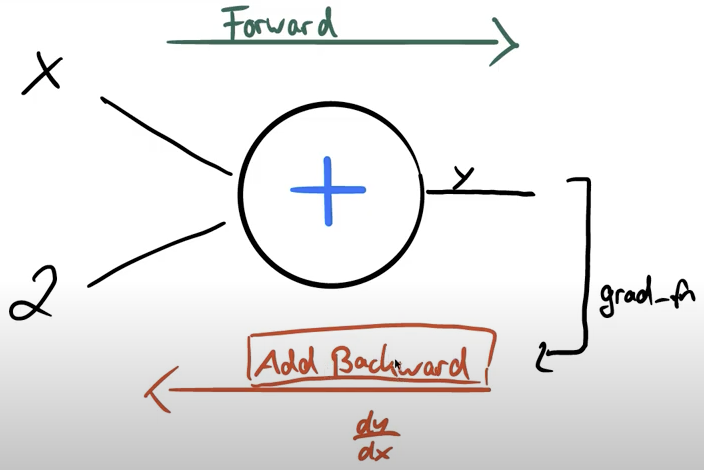

For each operation, we have inputs and outputs. Here, the operation is **addition (+)**, the inputs are **x** and **2** and the output is **y**.

First, we do a **Forward-pass** which calculates the output **y**. 
PyTorch will then automatically create and store a function which will be used in **Backpropagation** in order to get the gradients.

So here in the image, **y** has an attribute **grad_fn** which points to a gradient function **Add Backward**. This function will calculate the gradients of **y** with respect to **x** in the **Backward-pass**. 

In [ ]:
# some basic operations with tensors
y = x+2
print(y)

z = y*y*2
print(z)

# grad can be implicitly created only for scalar outputs
z = z.mean()
print(z)

tensor([3.0306, 4.3976, 2.3998], grad_fn=<AddBackward0>)
tensor([18.3689, 38.6779, 11.5177], grad_fn=<MulBackward0>)
tensor(22.8548, grad_fn=<MeanBackward0>)


In [ ]:
# calculate gradients
z.backward() #dz/dx (gradient of z with respect to x)
print(x.grad) # gradients are stored in 'grad' attribute

tensor([4.0408, 5.8635, 3.1997])


Whenever we call the **backward()** function, the gradients for this tensor will be stored into the **.grad** attribute.
This attribute actually creates a **Vector Jacobian Product** in the background to get the gradients. 

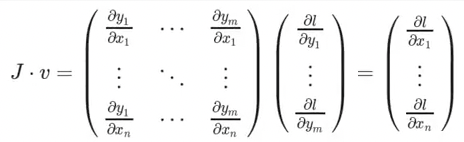

As shown in the image, **J** stands for the **Jacobian Matrix** containing the partial derivaties such as **dz/dx**, which is then multiplied with a gradient vector **v**. Thus, we get the final gradients **J.v**. 

In [ ]:
# vector jacobian product
y = x+2
z = y*y*2
print(z)

v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v)
print(x.grad)

tensor([18.3689, 38.6779, 11.5177], grad_fn=<MulBackward0>)
tensor([ 5.2530, 23.4539,  3.2093])


**Prevent PyTorch from tracking the history**

There are three options to calculate the **grad_fn** function and prevent the tracking history.

1.   **x.requires_grad_(False)** → whenever PyTorch function has a trailing underscore, it means it will modify the variable in place.

2.   **x.detach()** → this will create a new vector/tensor with the same values, but it doesn't require the gradients.

3.   **with torch.no_grad()**

In [ ]:
# option 1
print(x)
x.requires_grad_(False)
print(x)

tensor([1.0306, 2.3976, 0.3998], requires_grad=True)
tensor([1.0306, 2.3976, 0.3998])


In [ ]:
# option 2
y = x.detach()
print(y)

tensor([1.0306, 2.3976, 0.3998])


In [ ]:
# option 3
with torch.no_grad():
  y = x+2
  print(y)

tensor([3.0306, 4.3976, 2.3998])


The **backward()** function stores the cummulative sum in the **.grad** attribute. Thus, the weights and gradients become incorrect after each iteration. So, before the next iteration of the optimization step, we have to **empty** the gradients to make the gradients correct.

In [ ]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(5):
  model_output = (weights*3).sum()

  model_output.backward()
  print(weights.grad)

  weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


### **Backpropagation Algorithm**


In [ ]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad=True)

# forward pass
y_hat = w * x
loss = (y_hat - y)**2
print(loss)

# backward pass
loss.backward()
print(w.grad)

## update weights
## next forward and backward pass

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


### **Gradient Descent with Autograd and Backpropagation**

**STEP 1**

Here, we will implement **Linear Regression** from scratch where we will do every step manually. First of all, we will implement the equations to calculate the model prediction and the loss function. Then, a numerical computation of the gradients and implement the formula. Finally, we will implement Gradient Descent algorithm to optimize our parameters.

1.   Prediction: Manually
2.   Gradients Computation: Manually
3.   Loss Computation: Manually
4.   Parameter updates: Manually



In [ ]:
import numpy as np 

# training samples
X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

# initialize weights
w = 0.0 

# model prediction
def forward(x):
  return w * x

# loss = MSE
def loss(y, y_pred):
  return ((y_pred - y)**2).mean()

# gradient
# MSE = 1 / n * (w*x - y)**2
# dJ/dw = 1 / n 2x (w*x - y)
def gradient(x, y, y_pred):
  return np.dot(2*x, y_pred-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients
  dw = gradient(X, Y, y_pred)

  # update weights
  w -= learning_rate * dw

  # print every second step
  if epoch % 2 == 0: 
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050331
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


**STEP 2**

In this step, we will replace the manually computed gradients with the automatic backpropagation algorithm from PyTorch.

1.   Prediction: Manually
2.   Gradients Computation: **Autograd**
3.   Loss Computation: Manually
4.   Parameter updates: Manually

In [ ]:
import torch

# training samples
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

# initialize weights
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
  return w * x

# loss = MSE
def loss(y, y_pred):
  return ((y_pred - y)**2).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients = backward pass
  l.backward() #dl/dw

  # update weights
  with torch.no_grad():
    w -= learning_rate * w.grad
  
  # zero gradients
  w.grad.zero_()

  # print every second step
  if epoch % 10 == 0: 
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


**STEP 3**

In this step, we will replace the manually computed loss and parameter updates with the **Loss** and **Optimizer** classes of PyTorch.

1.   Prediction: Manually
2.   Gradients Computation: **Autograd**
3.   Loss Computation: **PyTorch Loss**
4.   Parameter updates: **PyTorch Optimizer**

**General Training Pipeline in PyTorch**
1.   Design model (input and output size)
2.   Construct loss and optimizer
3.   Training Loop
      *   Forward pass: compute prediction
      *   Backward pass: gradients
      *   Update weights








In [ ]:
import torch
import torch.nn as nn

# training samples
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

# initialize weights
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
  return w * x

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate)

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients = backward pass
  l.backward() #dl/dw

  # update weights
  optimizer.step()
  
  # zero gradients
  optimizer.zero_grad()

  # print every second step
  if epoch % 10 == 0: 
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


**STEP 4**

In the last step, we will replace the manually computed prediction model by implementing a **PyTorch Model**.

1.   Prediction: **PyTorch Model**
2.   Gradients Computation: Autograd
3.   Loss Computation: PyTorch Loss
4.   Parameter updates: PyTorch Optimizer

In [ ]:
import torch
import torch.nn as nn

# training samples
X = torch.tensor([[1],[2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = model(X)

  # loss
  l = loss(Y, y_pred)

  # gradients = backward pass
  l.backward() #dl/dw

  # update weights
  optimizer.step()
  
  # zero gradients
  optimizer.zero_grad()

  # print every second step
  if epoch % 10 == 0: 
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

4 1
Prediction before training: f(5) = -4.015
epoch 1: w = -0.180, loss = 64.33626556
epoch 11: w = 1.656, loss = 1.66463494
epoch 21: w = 1.952, loss = 0.04316445
epoch 31: w = 1.999, loss = 0.00120749
epoch 41: w = 2.006, loss = 0.00011668
epoch 51: w = 2.007, loss = 0.00008348
epoch 61: w = 2.007, loss = 0.00007794
epoch 71: w = 2.007, loss = 0.00007339
epoch 81: w = 2.007, loss = 0.00006912
epoch 91: w = 2.007, loss = 0.00006510
Prediction after training: f(5) = 10.013


**STEP 4**

Another approach using a custom model.

In [ ]:
import torch
import torch.nn as nn

# training samples
X = torch.tensor([[1],[2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    #define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

model = LinearRegression(input_size, output_size)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = model(X)

  # loss
  l = loss(Y, y_pred)

  # gradients = backward pass
  l.backward() #dl/dw

  # update weights
  optimizer.step()
  
  # zero gradients
  optimizer.zero_grad()

  # print every second step
  if epoch % 10 == 0: 
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

4 1
Prediction before training: f(5) = -4.821
epoch 1: w = -0.322, loss = 71.46357727
epoch 11: w = 1.615, loss = 1.84922242
epoch 21: w = 1.926, loss = 0.04811661
epoch 31: w = 1.977, loss = 0.00150180
epoch 41: w = 1.985, loss = 0.00028079
epoch 51: w = 1.987, loss = 0.00023512
epoch 61: w = 1.988, loss = 0.00022068
epoch 71: w = 1.988, loss = 0.00020781
epoch 81: w = 1.988, loss = 0.00019572
epoch 91: w = 1.989, loss = 0.00018432
Prediction after training: f(5) = 9.977
